In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Corona") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-04-27 15:30:40,980 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Read all Data


In [4]:
df = spark.read.parquet(f"/taxi/dataset.parquet")

In [5]:
import pyspark.sql.functions as f

In [6]:
df.show(2)

+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+
|year|month|    pickup_datetime|   dropoff_datetime|passenger_count|     trip_distance|payment_type|tip_amount|trip_amount|total_amount|
+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+
|2012|    5|2012-05-24 08:33:55|2012-05-24 08:38:35|              4|1.2874720000000002|           2|       0.0|        5.4|         5.4|
|2009|   10|2009-10-20 06:50:13|2009-10-20 06:58:14|              1|          3.057746|           2|       0.0|        7.3|         7.3|
+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+
only showing top 2 rows



In [20]:
data = (
    df.groupBy("year", "month").count().orderBy("year", "month").withColumn("yyyy-mm", f.concat_ws("-", "year", "month"))
).toPandas()


In [21]:
data

,year,month,count,yyyy-mm
0,2009,1,14092412,2009-1
1,2009,2,13380075,2009-2
2,2009,3,14387170,2009-3
3,2009,4,14294760,2009-4
4,2009,5,14796102,2009-5
...,...,...,...,...
153,2021,10,2202810,2021-10
154,2021,11,2201289,2021-11
155,2021,12,2200284,2021-12
156,2022,1,2202312,2022-1


<AxesSubplot:title={'center':'Rides in 2016'}, xlabel='Month', ylabel='Rides'>

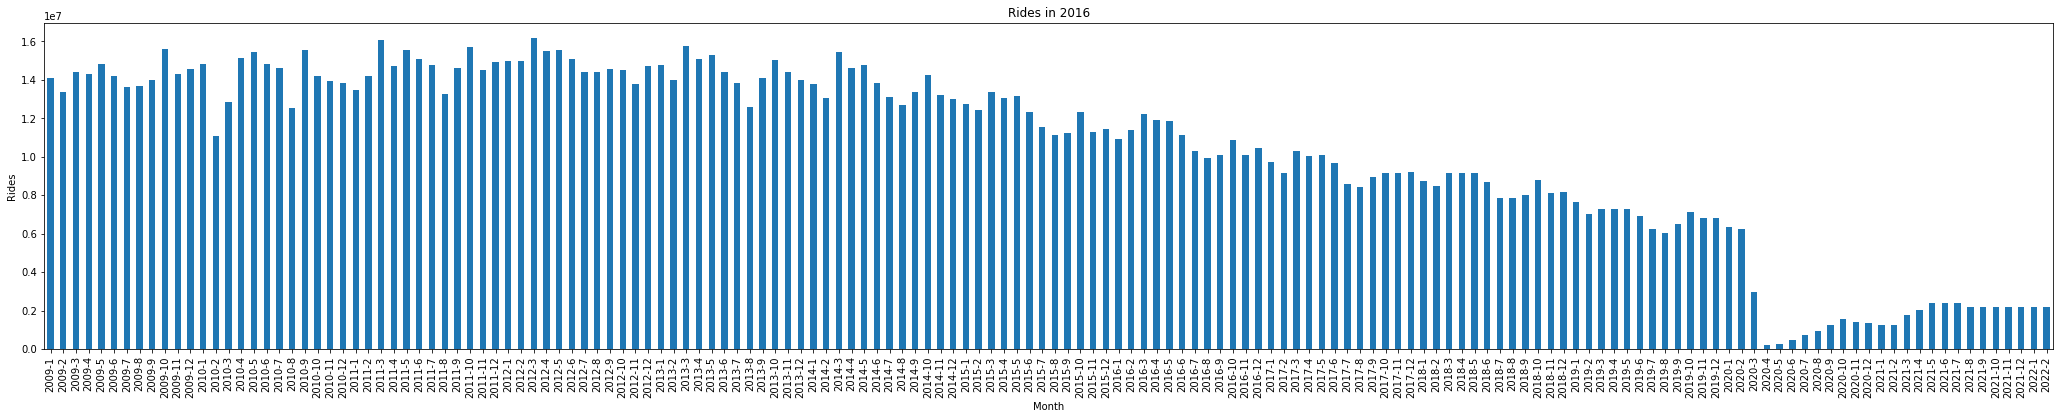

In [23]:
data.plot(
    x='yyyy-mm', y='count', figsize=(36, 6), 
    title='Rides in 2016',
    legend=False,
    kind='bar',
    xlabel='Month',
    ylabel='Rides'
)

### Stopping Spark 

In [24]:
spark.stop()